In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import legendre
import scipy.io as sio
from numpy import linalg as LA
from scipy.integrate import quad

In [2]:
data = sio.loadmat('hw05p1_clusterdata.mat')
T = data['T'][:,0].astype(float)
y = data['y'][:,0].astype(float)
M = y.shape[0]

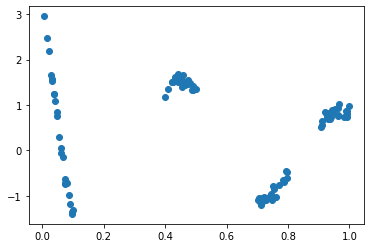

In [3]:
plt.plot(T, y, 'o')
plt.show()

In [4]:
def f_true(t):
    return np.sin(12*(t+0.2))/(t+0.2)

In [5]:
def lpoly(p, z):
    return np.sqrt(2*p+1) * legendre(p)(2*z-1)

In [6]:
def f_hat(t, w_hat):
    return sum([w_hat[n] * lpoly(n, t) for n in range(w_hat.shape[0])])

In [7]:
def construct_A(N, T):
    A = np.zeros((T.shape[0], N))
    for p in range(N):
        A[:,p] = lpoly(p, T)
    
    return A 

In [8]:
def solve_w_hat(A, y):
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

In [9]:
def compute_sample_error(A, y, w_hat):
    return LA.norm(y - np.dot(A, w_hat))

In [10]:
def compute_generalization_error(w_hat):
    return np.sqrt(quad(integrand, 0, 1, args=(w_hat,))[0])

In [11]:
def integrand(t, w_hat):
    return (f_hat(t, w_hat) - f_true(t))**2

In [12]:
# (a) Find the best cubic fit to the data using least-squares.
p = 3
N = p + 1
A = construct_A(N, T)
w_hat = solve_w_hat(A, y)
w_hat

array([ 0.61240722, -0.46169933, -0.05688734,  0.61338485])

In [13]:
sample_error = compute_sample_error(A, y, w_hat)
sample_error

9.251142339796058

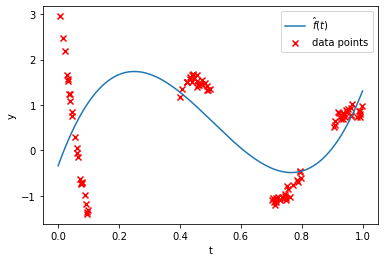

In [14]:
t = np.linspace(0, 1, 1000)
y_hat = f_hat(t, w_hat)
plt.plot(t, y_hat, label=r"$\hat{f}(t)$")
plt.scatter(T, y, marker='x', color='red', label='data points')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.savefig('p1a.png')
plt.show()

In [15]:
# (b) Compute the generalization error
generalization_error = compute_generalization_error(w_hat)
generalization_error

1.7877793282737833

Polynomials of order 5
The largest singular value of A is 15.577419535252167
The smallest singular value of A is 4.504648300787628
sample error is 1.5272594494759275
generalization error is 0.7172751484167388


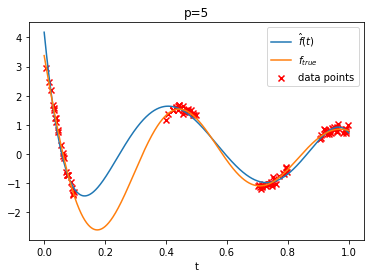


Polynomials of order 10
The largest singular value of A is 16.52470831503689
The smallest singular value of A is 0.5323015505974718
sample error is 0.7700276242129291
generalization error is 0.16422847645660607


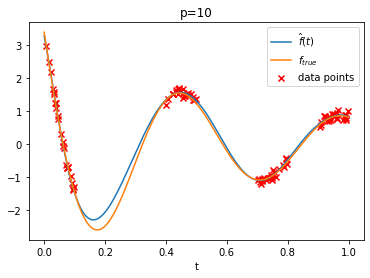


Polynomials of order 15
The largest singular value of A is 17.340946868268116
The smallest singular value of A is 0.08714823187642695
sample error is 0.7208357436242769
generalization error is 1.0753569052305256


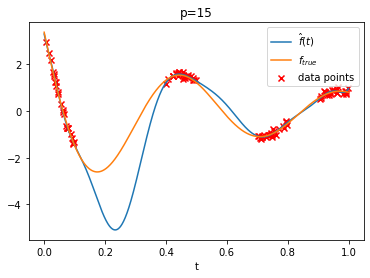


Polynomials of order 20
The largest singular value of A is 18.663952639537197
The smallest singular value of A is 0.012588210551821936
sample error is 0.6973576051302781
generalization error is 4.005985631236266


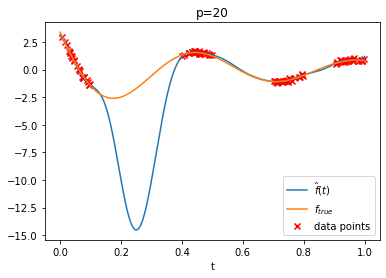


Polynomials of order 25
The largest singular value of A is 19.89203824450527
The smallest singular value of A is 0.0014654447276160497
sample error is 0.6869148750669921
generalization error is 39.105258334842425


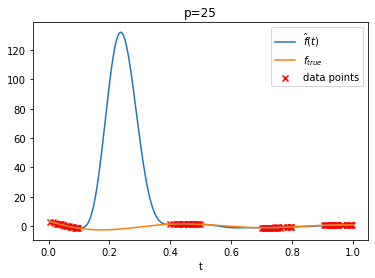

In [16]:
# (c) Repeat parts (a) and (b) for polynomials of order p = 5, 10, 15, 20, 25
sample_errors = []
generalization_errors = []
for p in [5, 10, 15, 20, 25]:
    print(f"Polynomials of order {p}")
    N = p + 1
    A = construct_A(N, T)
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    print(f"The largest singular value of A is {np.max(s)}")
    print(f"The smallest singular value of A is {np.min(s)}")
    
    w_hat = solve_w_hat(A, y)
    sample_error = compute_sample_error(A, y, w_hat)
    sample_errors.append(sample_error)
    print(f"sample error is {sample_error}")
    generalization_error = compute_generalization_error(w_hat)
    generalization_errors.append(generalization_error)
    print(f"generalization error is {generalization_error}")
    plt.figure()
    y_hat = f_hat(t, w_hat)
    y_true = f_true(t)
    plt.plot(t, y_hat, label=r"$\hat{f}(t)$")
    plt.plot(t, y_true, label=r"$f_{true}}(t)$")
    plt.scatter(T, y, marker='x', color='red', label='data points')
    plt.xlabel("t")
    plt.title(f"p={p}")
    plt.legend()
    plt.savefig('p1c_p_{}.png'.format(p))
    plt.show()
    print()

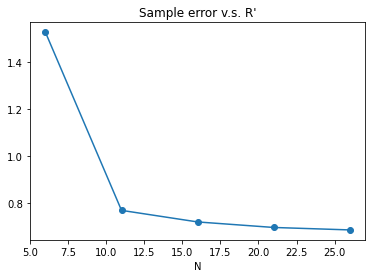

In [17]:
plt.figure()
plt.plot([6, 11, 16, 21, 26], sample_errors, marker='o')
plt.xlabel("N")
plt.title("Sample error v.s. R'")
plt.savefig('p1c-sample.png')
plt.show()

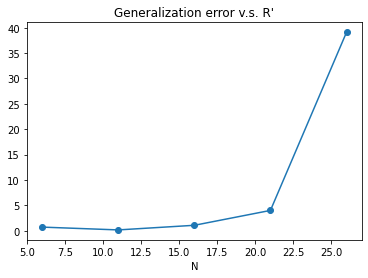

In [18]:
plt.figure()
plt.plot([6, 11, 16, 21, 26], generalization_errors, marker='o')
plt.xlabel("N")
plt.title("Generalization error v.s. R'")
plt.savefig('p1c-generalization.png')
plt.show()

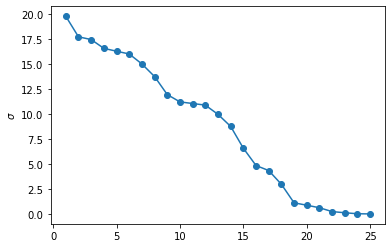

In [19]:
# (d)
N = 25
A = construct_A(N, T)
u, s, vh = np.linalg.svd(A, full_matrices=False)
plt.plot(range(1,N+1), s, marker='o')
plt.ylabel(r"$\sigma$")
plt.savefig('p1d.png')
plt.show()

In [20]:
s

array([1.98158439e+01, 1.77527245e+01, 1.74805868e+01, 1.65988659e+01,
       1.63106805e+01, 1.60348639e+01, 1.50360533e+01, 1.37721784e+01,
       1.19672380e+01, 1.12312133e+01, 1.10695458e+01, 1.09075028e+01,
       9.98482778e+00, 8.77383216e+00, 6.58802089e+00, 4.85440484e+00,
       4.34983857e+00, 2.97349172e+00, 1.11390512e+00, 8.76294654e-01,
       6.21010575e-01, 2.36817749e-01, 1.18294540e-01, 1.94737667e-02,
       3.03671396e-03])

In [21]:
def solve_truncated_w_hat(u, v, sigma, y, R_prime):
    return sum([1./sigma[r] * np.dot(y, u[:,r]) * v[:,r] for r in range(R_prime)])

In [ ]:
# (e)
sample_errors = []
generalization_errors = []
for R_prime in range(5,26):
    w_hat = solve_truncated_w_hat(u, vh.T, s, y, R_prime)
    sample_errors.append(compute_sample_error(A, y, w_hat))
    generalization_errors.append(compute_generalization_error(w_hat))

In [ ]:
sample_errors

In [ ]:
generalization_errors

In [ ]:
plt.plot(range(5,26), sample_errors, marker='o')
plt.xlabel(r"R'")
plt.title("Sample error v.s. R'")
plt.savefig('p1e-sample.png')
plt.show()

In [ ]:
plt.plot(range(5,26), generalization_errors, marker='o')
plt.xlabel(r"R'")
plt.title("Generalization error v.s. R'")
plt.savefig('p1e-generalization.png')
plt.show()

In [ ]:
#(f)
def solve_ridge_w_hat(A, y, delta):
    a = np.dot(A.T, A) + delta * np.identity(A.shape[1])
    b = np.dot(A.T, y)
    w_hat = np.linalg.solve(a, b)
    return w_hat

In [ ]:
N = 25
A = construct_A(N, T)
delta = 1e-3
w_hat = solve_ridge_w_hat(A, y, delta)
y_hat = f_hat(t, w_hat)
y_true = f_true(t)
plt.plot(t, y_hat, label=r"$\hat{f}(t)$")
plt.plot(t, y_true, label=r"$f_{true}}(t)$")
plt.scatter(T, y, marker='x', color='red', label='data points')
plt.xlabel("t")
plt.title(r"N=25, $\delta$=1e-3")
plt.legend()
plt.savefig('p1f.png')
plt.show()

In [ ]:
N = 25
A = construct_A(N, T)
deltas = [0., 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10]
sample_errors = []
generalization_errors = []
for delta in deltas:
    w_hat = solve_ridge_w_hat(A, y, delta)
    sample_errors.append(compute_sample_error(A, y, w_hat))
    generalization_errors.append(compute_generalization_error(w_hat))

In [ ]:
x = range(len(deltas))
my_xticks = ['0',r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$','1', '10']
plt.xticks(x, my_xticks)
plt.plot(x, sample_errors, marker='o',label='Sample Error')
plt.plot(x, generalization_errors, marker='x', label='Generalization Error')
plt.xlabel(r"$\delta$")
plt.legend()
plt.savefig('p1f-sample-generalization.png')
plt.show()

In [ ]:
sample_errors

In [ ]:
generalization_errors